11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


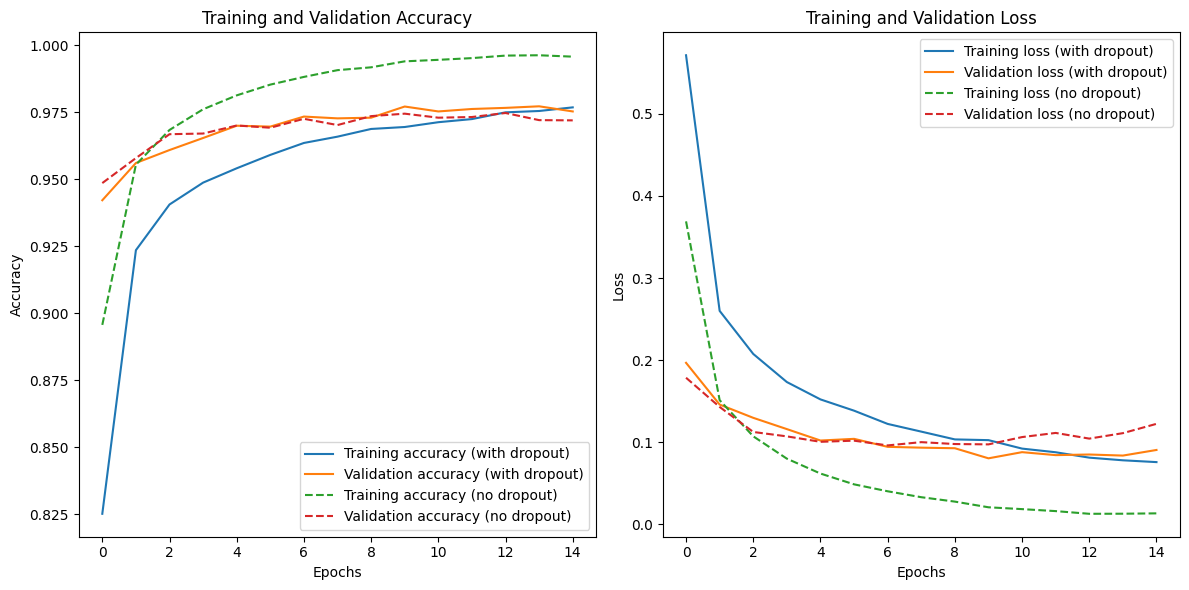

313/313 - 0s - 1ms/step - accuracy: 0.9774 - loss: 0.0824
313/313 - 0s - 1ms/step - accuracy: 0.9727 - loss: 0.1053
Test accuracy with dropout: 0.977400004863739
Test accuracy without dropout: 0.9726999998092651


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images to 1D vectors (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 784)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 784)).astype('float32')

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (convert the labels to one-hot format)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Define the model function with or without Dropout
def create_model(dropout_rate=None):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=784))

    if dropout_rate:
        model.add(layers.Dropout(dropout_rate))  # Add dropout layer if specified

    model.add(layers.Dense(64, activation='relu'))

    if dropout_rate:
        model.add(layers.Dropout(dropout_rate))  # Add dropout layer if specified

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Train model with dropout (lower dropout rate)
model_with_dropout = create_model(dropout_rate=0.3)  # Changed dropout rate to 0.3
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2, verbose=0)

# Step 4: Train model without dropout (baseline)
model_without_dropout = create_model(dropout_rate=None)
history_without_dropout = model_without_dropout.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2, verbose=0)

# Step 5: Plot the accuracy comparison
plt.figure(figsize=(12, 6))

# Plot accuracy with dropout vs without dropout
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['accuracy'], label='Training accuracy (with dropout)')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation accuracy (with dropout)')
plt.plot(history_without_dropout.history['accuracy'], label='Training accuracy (no dropout)', linestyle='dashed')
plt.plot(history_without_dropout.history['val_accuracy'], label='Validation accuracy (no dropout)', linestyle='dashed')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_with_dropout.history['loss'], label='Training loss (with dropout)')
plt.plot(history_with_dropout.history['val_loss'], label='Validation loss (with dropout)')
plt.plot(history_without_dropout.history['loss'], label='Training loss (no dropout)', linestyle='dashed')
plt.plot(history_without_dropout.history['val_loss'], label='Validation loss (no dropout)', linestyle='dashed')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Step 6: Evaluate both models on the test set
test_loss_with_dropout, test_acc_with_dropout = model_with_dropout.evaluate(x_test, y_test, verbose=2)
test_loss_without_dropout, test_acc_without_dropout = model_without_dropout.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f'Test accuracy with dropout: {test_acc_with_dropout}')
print(f'Test accuracy without dropout: {test_acc_without_dropout}')

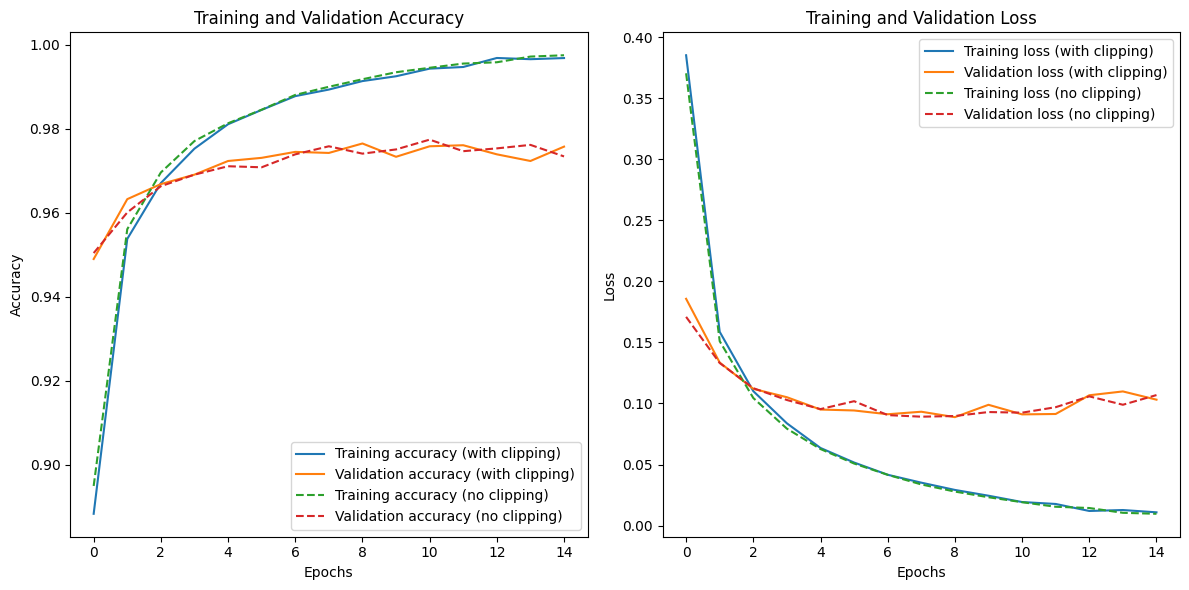

313/313 - 0s - 1ms/step - accuracy: 0.9780 - loss: 0.0857
313/313 - 0s - 1ms/step - accuracy: 0.9746 - loss: 0.1013
Test accuracy with gradient clipping: 0.9779999852180481
Test accuracy without gradient clipping: 0.9746000170707703


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images to 1D vectors (28x28 -> 784)
x_train = x_train.reshape((x_train.shape[0], 784)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 784)).astype('float32')

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels (convert the labels to one-hot format)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 2: Define the model function with or without Gradient Clipping
def create_model(clip_value=None):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=784))

    model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))

    # Compile model with gradient clipping if clip_value is set
    optimizer = tf.keras.optimizers.Adam(clipvalue=clip_value) if clip_value else 'adam'
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Step 3: Train model with gradient clipping (set clip_value)
clip_value = 1.0  # Gradient clipping threshold
model_with_clipping = create_model(clip_value=clip_value)
history_with_clipping = model_with_clipping.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2, verbose=0)

# Step 4: Train model without gradient clipping (baseline)
model_without_clipping = create_model(clip_value=None)
history_without_clipping = model_without_clipping.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.2, verbose=0)

# Step 5: Plot the accuracy comparison
plt.figure(figsize=(12, 6))

# Plot accuracy with clipping vs without clipping
plt.subplot(1, 2, 1)
plt.plot(history_with_clipping.history['accuracy'], label='Training accuracy (with clipping)')
plt.plot(history_with_clipping.history['val_accuracy'], label='Validation accuracy (with clipping)')
plt.plot(history_without_clipping.history['accuracy'], label='Training accuracy (no clipping)', linestyle='dashed')
plt.plot(history_without_clipping.history['val_accuracy'], label='Validation accuracy (no clipping)', linestyle='dashed')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss comparison
plt.subplot(1, 2, 2)
plt.plot(history_with_clipping.history['loss'], label='Training loss (with clipping)')
plt.plot(history_with_clipping.history['val_loss'], label='Validation loss (with clipping)')
plt.plot(history_without_clipping.history['loss'], label='Training loss (no clipping)', linestyle='dashed')
plt.plot(history_without_clipping.history['val_loss'], label='Validation loss (no clipping)', linestyle='dashed')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Step 6: Evaluate both models on the test set
test_loss_with_clipping, test_acc_with_clipping = model_with_clipping.evaluate(x_test, y_test, verbose=2)
test_loss_without_clipping, test_acc_without_clipping = model_without_clipping.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy
print(f'Test accuracy with gradient clipping: {test_acc_with_clipping}')
print(f'Test accuracy without gradient clipping: {test_acc_without_clipping}')